In [29]:
import numpy as np
import matplotlib.pyplot as plt
import nbkode
nbkode.get_solvers()

(<AdamsBashforth1>,
 <AdamsBashforth2>,
 <AdamsBashforth3>,
 <AdamsBashforth4>,
 <AdamsBashforth5>,
 <AdamsMoulton1>,
 <AdamsMoulton2>,
 <AdamsMoulton3>,
 <AdamsMoulton4>,
 <AdamsMoulton5>,
 <ForwardEuler>,
 <BackwardEuler>,
 <BDF1>,
 <BDF2>,
 <BDF3>,
 <BDF4>,
 <BDF5>,
 <BDF6>,
 <Runge2>,
 <Runge3>,
 <Heun3>,
 <RungeKutta4>,
 <RungeKutta3_8>,
 <RungeKutta23>,
 <RungeKutta45>,
 <DOP853>)

In [30]:
def rhs(t, y):
    return -0.1 * y

In [31]:
t0 = 0.
y0 = 1.

In [32]:
solver = nbkode.Heun3(rhs, t0, y0)

In [33]:
ts = np.linspace(0, 1_000, 10_000)
ts, ys = solver.run(ts)

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


In [34]:
ys = ys.flatten()

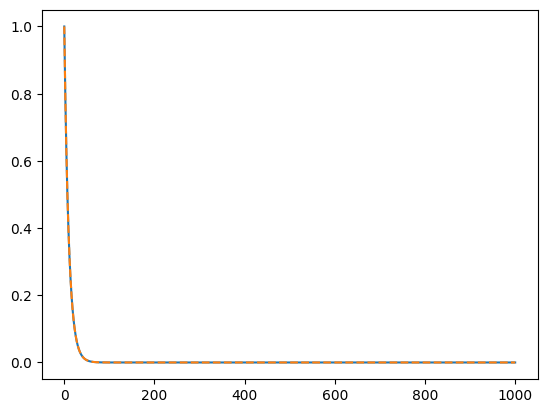

In [35]:
plt.plot(ts, ys)
plt.plot(ts, np.exp(-0.1 * ts), linestyle='--')

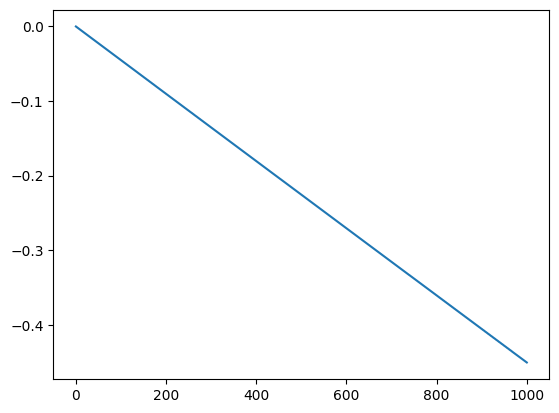

In [36]:
plt.plot(ts, (ys / np.exp(-0.1 * ts) - 1) * 100)

In [37]:
def rhs(t, y):
    return np.asarray([y[1], -y[0]])

In [38]:
y0 = [1., 0.]
t0 = 0

In [39]:
solver = nbkode.RungeKutta45(rhs, t0, y0)
ts = np.linspace(0, 100, 1_000)
ts, ys = solver.run(ts)

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


In [40]:
pos, vels = ys.T

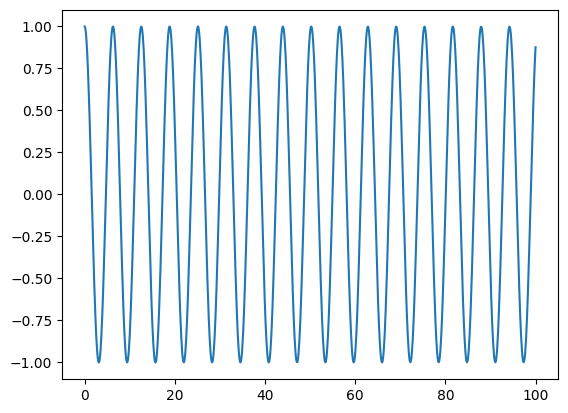

In [41]:
plt.plot(ts, pos)

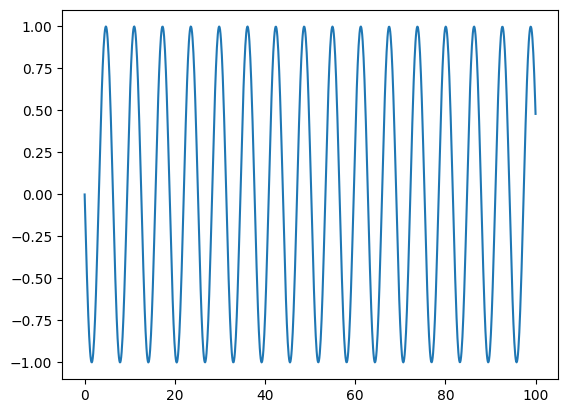

In [42]:
plt.plot(ts, vels)

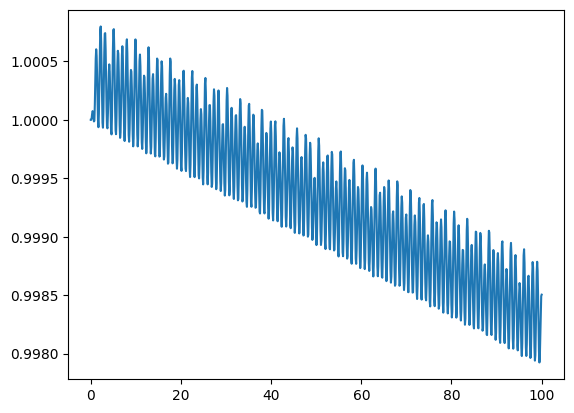

In [43]:
en = pos ** 2 + vels ** 2
plt.plot(ts, en)

In [47]:
def rhs(t, y, p):
    return p * y

In [48]:
y0 = [1., 2.]
p = -0.1
t0 = 0

solver = nbkode.RungeKutta45(rhs, t0, y0, params=p)
ts = np.linspace(0, 10, 100)
ts, ys = solver.run(ts)

/home/gsalinas/.pyenv/versions/3.10.7/envs/verlet/lib/python3.10/site-packages/nbkode/core.py:617: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  if not step(t_bound, rhs, cache, *args):


In [49]:
ys

array([[1.        , 2.        ],
       [0.98994983, 1.97989967],
       [0.98000067, 1.96000135],
       [0.9701515 , 1.940303  ],
       [0.96040131, 1.92080261],
       [0.9507491 , 1.90149821],
       [0.94119391, 1.88238782],
       [0.93173475, 1.8634695 ],
       [0.92237066, 1.84474132],
       [0.91310068, 1.82620136],
       [0.90392387, 1.80784774],
       [0.89483929, 1.78967858],
       [0.88584601, 1.77169203],
       [0.87694312, 1.75388624],
       [0.8681297 , 1.73625941],
       [0.85940486, 1.71880972],
       [0.8507677 , 1.7015354 ],
       [0.84221735, 1.68443469],
       [0.83375233, 1.66750466],
       [0.82537037, 1.65074075],
       [0.81707072, 1.63414144],
       [0.80885269, 1.61770537],
       [0.8007156 , 1.6014312 ],
       [0.79265879, 1.58531759],
       [0.78468159, 1.56936318],
       [0.77678332, 1.55356665],
       [0.76896333, 1.53792666],
       [0.76122095, 1.5224419 ],
       [0.75355552, 1.50711105],
       [0.74596639, 1.49193278],
       [0.